<a href="https://colab.research.google.com/github/Galahexolion/Giliojo-mokymo-sistem-taikymai/blob/main/Lab9_AE/lab9_ae_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# --- 1. DUOMENYS (MNIST) ---

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# Normalizuojame į [0, 1] ir ištiesiname į vektorių (784)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(f"Mokymo duomenys: {x_train.shape}")

Mokymo duomenys: (60000, 784)


In [5]:
# --- 2. MODELIS (Dense Autoencoder) ---
LATENT_SIZE = 32  # Suspaudimo dydis

# Encoder
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(512, activation='relu')(input_img)
encoded = layers.Dropout(0.2)(encoded)
encoded = layers.Dense(256, activation='relu')(encoded)
encoded = layers.Dense(128, activation='relu')(encoded)
encoded = layers.Dense(LATENT_SIZE, activation='relu')(encoded) # Latent vector

# Decoder
decoded = layers.Dense(128, activation='relu')(encoded)
decoded = layers.Dense(256, activation='relu')(decoded)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded) # Atkurtas vaizdas

# Apjungiame
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 784)            │       402,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,141,296 (4.35 MB)

 Trainable params: 1,141,296 (4.35 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# --- 3. MOKYMAS ---
# Autoenkoderis mokosi atkurti ĮĖJIMĄ (x_train -> x_train)
history = autoencoder.fit(x_train, x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - loss: 0.2961 - val_loss: 0.1508
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - loss: 0.1460 - val_loss: 0.1254
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - loss: 0.1278 - val_loss: 0.1151
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - loss: 0.1180 - val_loss: 0.1083
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.1115 - val_loss: 0.1041
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - loss: 0.1073 - val_loss: 0.1006
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - loss: 0.1041 - val_loss: 0.0976
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - loss: 0.1018 - val_loss: 0.0961
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.0998 - val_loss: 0.0943
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0983 - val_loss: 0.0931


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


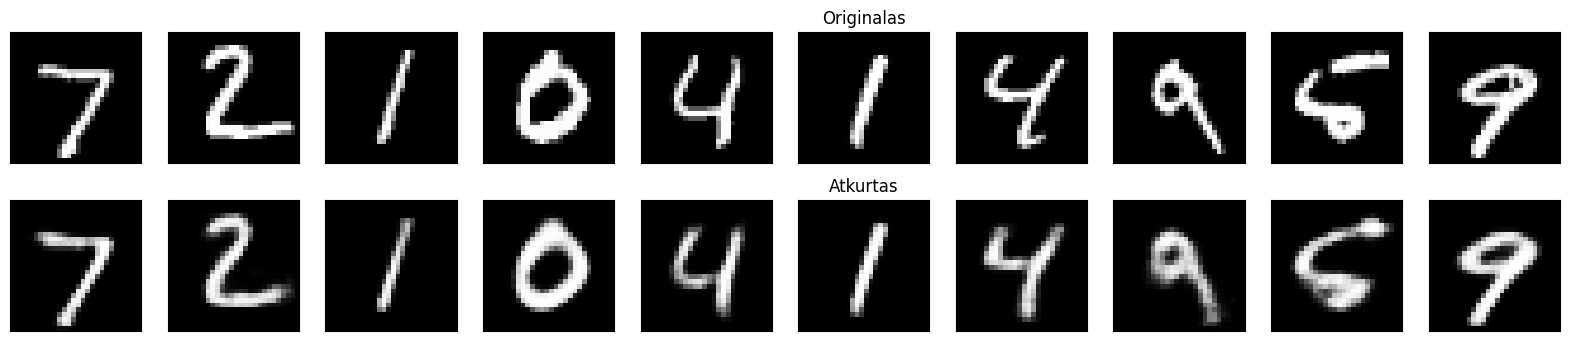

In [7]:
# --- 4. REZULTATAI ---
decoded_imgs = autoencoder.predict(x_test)

# Atvaizduojame
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Originalas
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2: ax.set_title("Originalas")

    # Atkurtas
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2: ax.set_title("Atkurtas")
plt.show()